In [65]:
# from google.colab import drive
# import sys

# # Mount Google Drive
# drive.mount('/content/drive')

# # Get the absolute path of the current folder
# abspath_curr = '/content/drive/My Drive/Colab Notebooks/'


In [66]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import seaborn as sns
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.multivariate.pca import PCA

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [68]:
Hies_data = pd.read_stata('/Users/kismatkhatri/Documents/Capstone project/310_HIES201819_Rescaledbyhhsize_24618obs.dta')

In [69]:
# Hies_data.shape # (24618, 393)
Hies_data['popwt_f']


0        3796.364746
1        4881.040527
2        3254.026855
3        3254.026855
4        2711.689209
            ...     
24613    5317.686035
24614    3988.264648
24615    5317.686035
24616    3988.264648
24617    4652.975098
Name: popwt_f, Length: 24618, dtype: float32

In [70]:
# !pip install pyreadstat
# import pyreadstat

# # Assuming you have a Stata dataset file named 'your_data.dta'
# df, meta = pyreadstat.read_dta(abspath_curr + '/data/PSLM_HIES/310_HIES201819_Rescaledbyhhsize_24618obs.dta')

# # Access variable labels from the metadata
# variable_labels = meta.column_labels

# # Print variable labels
# for i, var_label in enumerate(variable_labels):
#     var_name = df.columns[i]
#     print(f"Variable: {var_name}, Label: {var_label}")

In [71]:
Pslm_data = pd.read_stata('/Users/kismatkhatri/Documents/Capstone project/310_PSLM201920_Rescaledbyhhsize_160654obs.dta')

In [72]:
Pslm_data['popwt_f']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
160649   NaN
160650   NaN
160651   NaN
160652   NaN
160653   NaN
Name: popwt_f, Length: 160654, dtype: float32

In [73]:
# # Assuming you have a Stata dataset file named 'your_data.dta'
# df, meta = pyreadstat.read_dta(abspath_curr + '/data/PSLM_HIES/310_PSLM201920_Rescaledbyhhsize_160654obs.dta')

# # Access variable labels from the metadata
# variable_labels = meta.column_labels

# # Print variable labels
# for i, var_label in enumerate(variable_labels):
#     var_name = df.columns[i]
#     print(f"Variable: {var_name}, Label: {var_label}")

## Summary of PSLM and HIES


In [74]:
variables_list1 = [
    "W_dkw_inspiped",
    "W_dkw_inshandpump",
    "W_dkw_insmotorpump",
    "W_dkw_insclosedwell",
    "W_dkw_insopenwell",
    "W_dkw_insprotsprng",
    "W_dkw_insunprsprng",
    "W_dkw_outpiped",
    "W_dkw_outhandpump",
    "W_dkw_outmotorpump",
    "W_dkw_outclosedwell",
    "W_dkw_outopenwell",
    "W_dkw_outprotsprng",
    "W_dkw_outunprsprng",
    "W_dkw_pond",
    "W_dkw_bottwater",
    "W_dkw_tanker",
    "W_dkw_filtration",
    "W_dkw_other",
    "W_toilet_notoilet",
    "W_toilet_flushpub",
    "W_toilet_flushtank",
    "W_toilet_flushpit",
    "W_toilet_flushopen",
    "W_toilet_raiselat",
    "W_toilet_pitlat",
    "W_toilet_other",
    "W_toiletshared",
    "W_toiletprivate",
    "H_cooking_firewood",
    "H_cooking_gas",
    "H_cooking_lpg",
    "H_cooking_dung",
    "H_cooking_crop",
    "H_cooking_other",
    "H_floor_earth",
    "H_floor_ceramic",
    "H_floor_cement",
    "H_floor_bricks",
    "H_floor_other",
    "H_roof_rccrbc",
    "H_roof_wood",
    "H_roof_sheet",
    "H_roof_grader",
    "H_roof_other",
    "H_walls_burntbricks",
    "H_walls_mudbricks",
    "H_walls_wood",
    "H_walls_stones",
    "H_walls_other",
    "D_iradio",
    "D_itelevsion",
    "D_ilcdled",
    "D_irefrigerator",
    "D_ifreezer",
    "D_iwashing",
    "D_idryer",
    "D_iairconditioning",
    "D_iaircooler",
    "D_ifan",
    "D_istove",
    "D_icookingrange",
    "D_imicrowave",
    "D_isewingmachine",
    "D_iknitting",
    "D_iiron",
    "D_iwaterfilter",
    "D_idonkeypump",
    "D_iturbine",
    "D_ichair",
    "D_itable",
    "D_iups",
    "D_igenerator",
    "D_isolarpanel",
    "D_iheater",
    "D_igeaser",
    "D_ibicycle",
    "D_imotorcyclescotter",
    "D_irichshaw",
    "D_icar",
    "D_ivantruckbus",
    "D_iboat",
    "D_itractortralloy",
    "D_iclock"
]

# Assuming 'weights' is the column in your DataFrame that contains the survey weights
weights_pslm = Pslm_data['popwt']
weights_hies = Hies_data['popwt_f']

selected_variables_pslm = Pslm_data[variables_list1]
selected_variables_hies = Hies_data[variables_list1]

# Calculate weighted means and standard deviations for PSLM data
weighted_means_pslm = np.average(selected_variables_pslm, weights=weights_pslm, axis=0)
weighted_std_pslm = np.sqrt(np.average((selected_variables_pslm - weighted_means_pslm)**2, weights=weights_pslm, axis=0))

# Calculate weighted means and standard deviations for HIES data
weighted_means_hies = np.average(selected_variables_hies, weights=weights_hies, axis=0)
weighted_std_hies = np.sqrt(np.average((selected_variables_hies - weighted_means_hies)**2, weights=weights_hies, axis=0))

# Count the number of missing values for each variable
missing_values_pslm = selected_variables_pslm.isna().sum()
missing_values_hies = selected_variables_hies.isna().sum()

# Create a summary DataFrame
Summary_data = pd.DataFrame({
    'Weighted Mean PSLM': weighted_means_pslm,
    'Weighted Std PSLM': weighted_std_pslm,
    'Missing Values PSLM': missing_values_pslm,
    'Weighted Mean HIES': weighted_means_hies,
    'Weighted Std HIES': weighted_std_hies,
    'Missing Values HIES': missing_values_hies
}, index=variables_list1)

print(Summary_data)

                     Weighted Mean PSLM  Weighted Std PSLM  \
W_dkw_inspiped                 0.188993           0.391503   
W_dkw_inshandpump              0.179021           0.383370   
W_dkw_insmotorpump             0.277011           0.447522   
W_dkw_insclosedwell            0.012176           0.109670   
W_dkw_insopenwell              0.006802           0.082194   
...                                 ...                ...   
D_icar                         0.062710           0.242440   
D_ivantruckbus                 0.009387           0.096431   
D_iboat                        0.000640           0.025297   
D_itractortralloy              0.027484           0.163488   
D_iclock                       0.609786           0.487798   

                     Missing Values PSLM  Weighted Mean HIES  \
W_dkw_inspiped                         0            0.172982   
W_dkw_inshandpump                      0            0.181647   
W_dkw_insmotorpump                     0            0.296236   

## PCA for PSLM

In [81]:
# from statsmodels.multivariate.pca import PCA
# #from statsmodels.multivariate.pca import SurveyPCA

# selected_variables = Pslm_data[variables_list1].copy()


# # Drop rows with missing values and reset the index to align with the weights
# selected_variables.dropna(inplace=True)
# selected_variables.reset_index(drop=True, inplace=True)

# # Perform Min-Max scaling
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(selected_variables)

# # # Ensure the weights are aligned with the scaled data
# # weights = Pslm_data.loc[selected_variables.index, 'popwt'].values
# # sqrt_weights = np.sqrt(weights)

# # # Adjust data using the square root of weights
# # # This step is crucial since weights in PCA are usually applied to rows, not columns
# # weighted_data = scaled_data * sqrt_weights[:, np.newaxis]

# # Initialize the PCA object without specifying weights
# # since we have already adjusted the data with weights

# pca_model = PCA(scaled_data , weights= Pslm_data['popwt'], ncomp=1, standardize=False, demean=False)
# # pca_model = PCA(scaled_data , weights= Pslm_data['popwt'], ncomp=1, standardize=False, demean=False)

# # Fit the PCA model
# pca_model.fit()

# # Extract the components and loadings
# components = pca_model.factors
# loadings = pca_model.loadings

# # Analyze the PCA output
# # Print the explained variance
# explained_variance = pca_model.rsquare[0] if pca_model.rsquare.size > 0 else 0
# print(f'PCA variance explained: {explained_variance * 100:.2f}%')

# # Create the basis vector DataFrame
# basis_vector = pd.DataFrame(loadings, index=variables_list1)

# # Sort the basis vector by magnitude in descending order
# basis_vector.sort_values(by=0, ascending=False, inplace=True)

# # Save the basis vector to a CSV file
# basis_vector.to_csv('basis_vector.csv')

# # Add the wealth index as a new column in your DataFrame
# Pslm_data['Wealth_Index'] = components.squeeze()

# # Save the updated DataFrame with the wealth index to a new CSV file
# Pslm_data.to_csv('data_with_wealth_index.csv', index=False)


In [83]:
#from google.colab import files

#files.download('PSLM_data_with_wealth_index.csv')


In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Assuming Pslm_data and variables_list1 are defined and imported correctly.

# Step 1: Extract the selected columns and drop rows with missing values
selected_variables = Pslm_data[variables_list1].dropna().reset_index(drop=True)

# Step 2: Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Step 3: Calculate the square root of weights and adjust the scaled data
weights = Pslm_data.loc[selected_variables.index, 'popwt']
sqrt_weights = np.sqrt(weights)

# This ensures that the weights are applied to each observation
weighted_data = scaled_data * sqrt_weights[:, None]  # Using None instead of np.newaxis to avoid the warning

# Step 4: Apply PCA on the weighted data
pca = PCA(n_components=1)
pca.fit(weighted_data)

# Multiply the PCA components by the square root of the eigenvalues if necessary
components = pca.transform(weighted_data) * np.sqrt(pca.explained_variance_)

# Step 5: Analyze the PCA output
explained_variance = pca.explained_variance_ratio_[0]
print(f'PCA variance explained: {explained_variance * 100:.2f}%')

# Create the basis vector DataFrame
basis_vector = pd.DataFrame(pca.components_.T, index=variables_list1, columns=['Magnitude'])

# Sort the basis vector by magnitude in descending order
basis_vector.sort_values(by='Magnitude', ascending=False, inplace=True)

# Normalize the wealth index if necessary to match the expected range
wealth_index = components.squeeze()
min_max_scaler = MinMaxScaler(feature_range=(-2, 2))
Pslm_data['Wealth_Index1'] = min_max_scaler.fit_transform(wealth_index.reshape(-1, 1))

# Save the basis vector and updated DataFrame to CSV files
basis_vector.to_csv('PSLM_DATA_with_basis_vector.csv')
Pslm_data.to_csv('PSLM_data_with_wealth_index.csv', index=False)


/var/folders/zg/n2c3c7jj1t5dv6zbxjqxzbnc0000gn/T/ipykernel_36514/3052149695.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * sqrt_weights[:, None]  # Using None instead of np.newaxis to avoid the warning


PCA variance explained: 25.60%


In [85]:
Pslm_data['Wealth_Index1']

0        -1.375055
1        -1.567844
2        -1.694693
3        -1.365148
4        -1.391423
            ...   
160649   -1.550367
160650   -1.408643
160651   -1.779701
160652   -1.728680
160653   -1.821425
Name: Wealth_Index1, Length: 160654, dtype: float64

In [86]:
# Step 1: Extract the selected columns and drop rows with missing values
selected_variables = Hies_data[variables_list1].dropna().reset_index(drop=True)

# Step 2: Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Step 3: Calculate the square root of weights and adjust the scaled data
weights = Hies_data.loc[selected_variables.index, 'popwt']
sqrt_weights = np.sqrt(weights)

# This ensures that the weights are applied to each observation
weighted_data = scaled_data * sqrt_weights[:, np.newaxis]

# Step 4: Apply PCA on the weighted data
pca = PCA(n_components=1)
pca.fit(weighted_data)

# Multiply the PCA components by the square root of the eigenvalues if necessary
components = pca.transform(weighted_data) * np.sqrt(pca.explained_variance_)

# Step 5: Analyze the PCA output
explained_variance = pca.explained_variance_ratio_[0]
print(f'PCA variance explained: {explained_variance * 100:.2f}%')

# Create the basis vector DataFrame
basis_vector = pd.DataFrame(pca.components_.T, index=variables_list1, columns=['Magnitude'])

# Sort the basis vector by magnitude in descending order
basis_vector.sort_values(by='Magnitude', ascending=False, inplace=True)

# Normalize the wealth index if necessary to match the expected range
wealth_index = components.squeeze()
min_max_scaler = MinMaxScaler(feature_range=(-2, 2))
Hies_data['Wealth_Index1'] = min_max_scaler.fit_transform(wealth_index.reshape(-1, 1))

# Save the basis vector and updated DataFrame to CSV files
basis_vector.to_csv('HIES_DATA_with_basis_vector.csv')
Hies_data.to_csv('HIES_data_with_wealth_index.csv', index=False)


/var/folders/zg/n2c3c7jj1t5dv6zbxjqxzbnc0000gn/T/ipykernel_36514/2226146111.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * sqrt_weights[:, np.newaxis]


PCA variance explained: 25.04%


In [87]:
Hies_data['Wealth_Index1']

0       -1.136745
1       -1.058097
2       -0.848573
3       -1.441907
4       -1.060915
           ...   
24613   -0.830041
24614   -0.892117
24615   -0.718182
24616   -0.811159
24617   -0.826415
Name: Wealth_Index1, Length: 24618, dtype: float64

In [93]:
from statsmodels.multivariate.pca import PCA


# Step 3: Build a matrix with the answers of every surveyed
answers_matrix = Hies_data[variables_list1].copy()

# Step 4: Scale the matrix to [0, 1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(answers_matrix)

# Step 5: Carry PCA on the scaled matrix
# Here, we are taking into account the survey weights for each observation
pca = PCA(X_scaled, weights=Hies_data['popwt'], ncomp=1, standardize=False, demean=False)

# Fit the PCA model
pca_results = pca.fit()

# Step 6: Compute the RWI for each surveyed by using the first principal component scores
Hies_data['RWI'] = pca_results.scores[:, 0]

# Display the first few rows of the dataframe to verify
Hies_data[['RWI']].head()

ValueError: weights should have nvar elements

## Distribution of a wealth index estimated in the HIES and PLSM

In [88]:
hies_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
pslm_data = pd.read_csv('HIES_data_with_wealth_index.csv')


# Function to calculate distribution statistics of the wealth index
def calculate_distribution_statistics(data, wealth_index_column='Wealth_Index1', group_by_columns=None):
    if group_by_columns:
        grouped_data = data.groupby(group_by_columns)
        statistics = grouped_data[wealth_index_column].agg(['mean', 'std', 'median', 'quantile'])
    else:
        statistics = data[wealth_index_column].agg(['mean', 'std', 'median', 'quantile']).to_frame().transpose()
    return statistics

# Calculate distribution statistics for HIES dataset
hies_national_stats = calculate_distribution_statistics(hies_data)
hies_urban_rural_stats = calculate_distribution_statistics(hies_data, group_by_columns='rural')
hies_province_stats = calculate_distribution_statistics(hies_data, group_by_columns='Province')
hies_urban_rural_province_stats = calculate_distribution_statistics(hies_data, group_by_columns=['Province', 'rural'])

# Calculate distribution statistics for PSLM dataset
pslm_national_stats = calculate_distribution_statistics(pslm_data)
pslm_urban_rural_stats = calculate_distribution_statistics(pslm_data, group_by_columns='rural')
pslm_province_stats = calculate_distribution_statistics(pslm_data, group_by_columns='Province')
pslm_urban_rural_province_stats = calculate_distribution_statistics(pslm_data, group_by_columns=['Province', 'rural'])

# Display the results for HIES dataset
hies_national_stats, hies_urban_rural_stats, hies_province_stats, hies_urban_rural_province_stats


(                   mean       std    median  quantile
 Wealth_Index1 -1.389585  0.295194 -1.419269 -1.419269,
            mean       std    median  quantile
 rural                                        
 rural -1.479057  0.252353 -1.518331 -1.518331
 urban -1.191472  0.286542 -1.202114 -1.202114,
                  mean       std    median  quantile
 Province                                           
 Balochistan -1.608429  0.192254 -1.670535 -1.670535
 KP          -1.437228  0.263270 -1.484435 -1.484435
 Punjab      -1.304554  0.290779 -1.324698 -1.324698
 Sindh       -1.445510  0.294942 -1.473867 -1.473867,
                        mean       std    median  quantile
 Province    rural                                        
 Balochistan rural -1.650113  0.157079 -1.697392 -1.697392
             urban -1.424508  0.222933 -1.452200 -1.452200
 KP          rural -1.473636  0.233851 -1.513520 -1.513520
             urban -1.173384  0.309999 -1.201582 -1.201582
 Punjab      rural -1.38943

## Harmonizing wealth indices

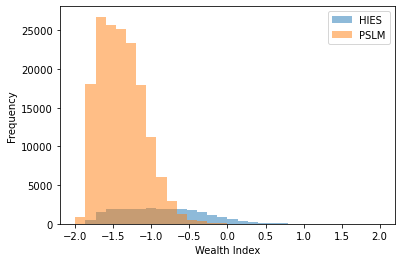

In [89]:
# Calculate descriptive statistics
mean_HIES = np.mean(Hies_data['Wealth_Index1'])
std_HIES = np.std(Hies_data['Wealth_Index1'])

mean_PSLM = np.mean(Pslm_data['Wealth_Index1'])
std_PSLM = np.std(Pslm_data['Wealth_Index1'])

# Visual inspection (histograms)
import matplotlib.pyplot as plt

plt.hist(Hies_data['Wealth_Index1'], bins=30, alpha=0.5, label='HIES')
plt.hist(Pslm_data['Wealth_Index1'], bins=30, alpha=0.5, label='PSLM')
plt.legend(loc='upper right')
plt.xlabel('Wealth Index')
plt.ylabel('Frequency')
plt.show()

# Assuming HIES_data and PSLM_data are pandas DataFrames
# Align the data to have the same length
min_length = min(len(Hies_data), len(Pslm_data))
HIES_data = Hies_data.iloc[:min_length]
PSLM_data = Pslm_data.iloc[:min_length]


In [90]:
import pandas as pd

# Load the PSLM and HIES data with wealth indices
pslm_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
hies_data = pd.read_csv('HIES_data_with_wealth_index.csv')

# Add survey weights
pslm_data['weights'] = pslm_data['popwt']
hies_data['weights'] = hies_data['popwt_f']

# Calculate weighted means and standard deviations for wealth indices
weighted_mean_pslm = (pslm_data['Wealth_Index1'] * pslm_data['weights']).sum() / pslm_data['weights'].sum()
weighted_std_pslm = ((pslm_data['Wealth_Index1'] - weighted_mean_pslm)**2 * pslm_data['weights']).sum() / pslm_data['weights'].sum()

weighted_mean_hies = (hies_data['Wealth_Index1'] * hies_data['weights']).sum() / hies_data['weights'].sum()
weighted_std_hies = ((hies_data['Wealth_Index1'] - weighted_mean_hies)**2 * hies_data['weights']).sum() / hies_data['weights'].sum()

# Standardize wealth indices within each dataset
pslm_data['Wealth_Index_PSLM_Standardized'] = (pslm_data['Wealth_Index1'] - weighted_mean_pslm) / weighted_std_pslm
hies_data['Wealth_Index_HIES_Standardized'] = (hies_data['Wealth_Index1'] - weighted_mean_hies) / weighted_std_hies

# Calculate weighted average for harmonized wealth index
total_weights = pslm_data['weights'].sum() + hies_data['weights'].sum()
harmonized_wealth_index_pslm = (pslm_data['Wealth_Index_PSLM_Standardized'] * pslm_data['weights']) / total_weights
harmonized_wealth_index_hies = (hies_data['Wealth_Index_HIES_Standardized'] * hies_data['weights']) / total_weights

# Add the harmonized wealth index to both datasets
pslm_data['Harmonized_Wealth_Index1'] = harmonized_wealth_index_pslm
hies_data['Harmonized_Wealth_Index1'] = harmonized_wealth_index_hies

# Save the updated datasets with harmonized wealth indices
pslm_data.to_csv('PSLM_data_with_harmonized_wealth_index.csv', index=False)
hies_data.to_csv('HIES_data_with_harmonized_wealth_index.csv', index=False)



In [91]:
hies_data['Harmonized_Wealth_Index1']

0       -0.000010
1       -0.000011
2       -0.000003
3       -0.000015
4       -0.000006
           ...   
24613   -0.000005
24614   -0.000005
24615   -0.000001
24616   -0.000003
24617   -0.000004
Name: Harmonized_Wealth_Index1, Length: 24618, dtype: float64

## Household wealth correlates with household expenditure in HIES Data

In [92]:
from scipy.stats import spearmanr

# Load the HIES data with the wealth index
hies_data = pd.read_csv('HIES_data_with_wealth_index.csv')

# Aggregate the data at the province level
province_agg = hies_data.groupby('Province').agg({'Wealth_Index1': 'mean', 'lnexpM': 'mean'}).reset_index()

# Calculate the Spearman rank correlation
correlation, p_value = spearmanr(province_agg['Wealth_Index1'], province_agg['lnexpM'])

# Print the results
print(f"Spearman Rank Correlation at Province Level: {correlation:.2f}")
print(f"P-Value: {p_value:.4f}")

Spearman Rank Correlation at Province Level: 0.80
P-Value: 0.2000


## Comparing the RWI with the wealth index from the PSLM data

In [64]:
# Load the RWI data from the CSV file
rwi_data = pd.read_csv(abspath_curr + '/data/pak_rwi.csv')

NameError: name 'abspath_curr' is not defined

In [ ]:
districts = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')
print(districts.head())

In [ ]:
geometry = [Point(xy) for xy in zip(rwi_data['longitude'], rwi_data['latitude'])]
rwi_data = gpd.GeoDataFrame(rwi_data, geometry=geometry)

# Perform the spatial join to associate RWI data with districts
rwi_data_with_district = gpd.sjoin(rwi_data, districts, how="left", op="within")

In [ ]:
# Filter the data to retain only the districts in Punjab, Sindh, Balochistan, KP, and Islamabad
provinces_to_include = ["Punjab", "Sindh", "Balochistan", "Khyber Pakhtunkhwa", "Islamabad"]
filtered_rwi_district_data = rwi_data_with_district[rwi_data_with_district['ADM1_EN'].isin(provinces_to_include)]

filtered_rwi_district_data.head()


In [ ]:
# Create a mapping dictionary for district names
district_mapping = {
    'Central Karachi': 'Karachi Central',
    'Chitral Lower': 'Chitral',
    'Chitral Upper': 'Chitral',
    'D. I. Khan': 'Dera Ismail Khan',
    'East Karachi': 'Karachi East',
    'Kashmore': 'Kashmor',
    'Kohistan Lower': 'Kohistan',
    'Kohistan Upper': 'Kohistan',
    'Korangi Karachi': 'Korangi',
    'Leiah': 'Layyah',
    'Malakand': 'Malakand Protected Area',
    'Malir Karachi': 'Malir',
    'Shaheed Benazir Abad': 'Shaheed Benazirabad',
    'South Karachi': 'Karachi South',
    'Tor Ghar': 'Torghar',
    'West Karachi': 'Karachi West',
    'Shaheed Sikandarabad': 'Surab'
}

# Apply the mapping dictionary to the 'ADM2_EN' column of the filtered_rwi_district_data dataframe
filtered_rwi_district_data['ADM2_EN'] = filtered_rwi_district_data['ADM2_EN'].replace(district_mapping)


In [ ]:
district_mean_rwi = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].mean().reset_index()

# Sort the districts by RWI score in descending order
ranked_districts = district_mean_rwi.sort_values(by='rwi', ascending=False)

# Print the ranked districts
print(ranked_districts)


In [ ]:

pslm_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
# Aggregating Wealth Index for PSLM
pslm_district_wealth = pslm_data.groupby('District')['Wealth_Index1'].mean().reset_index()

# Filter the RWI data to include only the common districts
common_districts = set(pslm_district_wealth['District'])
filtered_rwi_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'].isin(common_districts)]

# Aggregating RWI scores by district
rwi_district_wealth = filtered_rwi_data.groupby('ADM2_EN')['rwi'].mean()

# Ranking Districts based on wealth indices
pslm_district_ranking = pslm_district_wealth.sort_values(by='Wealth_Index1', ascending=False).reset_index(drop=True)
rwi_district_ranking = rwi_district_wealth.sort_values(ascending=False).reset_index()

# Save the rankings (optional)
pslm_district_ranking.to_csv('pslm_district_ranking.csv', index=False)
rwi_district_ranking.to_csv('rwi_district_ranking.csv', index=False)

# Calculate Spearman's rank correlation between PSLM and RWI rankings
corr_pslm_rwi, _ = spearmanr(pslm_district_ranking['Wealth_Index1'], rwi_district_ranking['rwi'])

print(f"Spearman's rank correlation between PSLM and RWI: {corr_pslm_rwi:.2f}")


In [ ]:
# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pslm_district_ranking['Wealth_Index1'], y=rwi_district_ranking['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Heatmap (Difference between rankings)
# Assuming you have a shapefile 'districts_shapefile.shp' with district boundaries
gdf = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')

# Calculate the difference in rankings
pslm_district_ranking['PSLM Rank'] = pslm_district_ranking.index + 1
rwi_district_ranking['RWI Rank'] = rwi_district_ranking.index + 1
merged_rankings = pd.merge(pslm_district_ranking, rwi_district_ranking, left_on='District', right_on='ADM2_EN')
merged_rankings['Rank Difference'] = merged_rankings['PSLM Rank'] - merged_rankings['RWI Rank']

# Merge with the geodataframe
gdf = gdf.merge(merged_rankings, left_on='ADM2_EN', right_on='District', how='inner')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Rank Difference', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Difference in District Wealth Rankings between PSLM and RWI")
plt.tight_layout()
plt.show()

In [ ]:
# Merge the two datasets on the district names
combined_data = pslm_district_ranking.merge(rwi_district_ranking, left_on='District', right_on='ADM2_EN')

n_bootstrap_samples = 1000
correlation_samples = []

for _ in range(n_bootstrap_samples):
    # Randomly sample districts with replacement
    sample = combined_data.sample(n=combined_data.shape[0], replace=True)

    # Calculate the correlation for this resampled data
    corr, _ = spearmanr(sample['Wealth_Index1'], sample['rwi'])
    correlation_samples.append(corr)

# Analyze bootstrap results
bootstrap_mean = np.mean(correlation_samples)
bootstrap_std = np.std(correlation_samples)
confidence_interval = np.percentile(correlation_samples, [2.5, 97.5])

print(f"Bootstrap Mean Correlation: {bootstrap_mean:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


In [ ]:

# Scatter plot of RWI vs PSLM scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data['Wealth_Index1'], y=combined_data['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
#plt.show()

plt.savefig(abspath_curr + '/data/scatter_plot.png')
plt.show()

# Histograms
plt.figure(figsize=(14, 6))

# PSLM histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_data['Wealth_Index1'], kde=True)
plt.title('Distribution of PSLM Wealth Index')
plt.xlabel('PSLM Wealth Index')
plt.ylabel('Count')

# RWI histogram
plt.subplot(1, 2, 2)
sns.histplot(combined_data['rwi'], kde=True)
plt.title('Distribution of RWI Scores')
plt.xlabel('RWI Score')
plt.ylabel('Count')

plt.tight_layout()
#plt.show()


plt.savefig(abspath_curr + '/data/histplot.png')
plt.show()



## Comparing the RWI with the  Harmonized Wealth index from the PSLM data

In [ ]:
pslm_data1 = pd.read_csv('PSLM_data_with_harmonized_wealth_index.csv')
# Aggregating Wealth Index for PSLM
pslm_district_wealth1 = pslm_data1.groupby('District')['Harmonized_Wealth_Index1'].mean().reset_index()

# Filter the RWI data to include only the common districts
common_districts1 = set(pslm_district_wealth1['District'])
filtered_rwi_data1 = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'].isin(common_districts)]

# Aggregating RWI scores by district
rwi_district_wealth1 = filtered_rwi_data1.groupby('ADM2_EN')['rwi'].mean()

# Ranking Districts based on wealth indices
pslm_district_ranking1 = pslm_district_wealth1.sort_values(by='Harmonized_Wealth_Index1', ascending=False).reset_index(drop=True)
rwi_district_ranking1 = rwi_district_wealth1.sort_values(ascending=False).reset_index()

# Save the rankings (optional)
pslm_district_ranking1.to_csv('pslm_district_ranking_with_HarmonizedWealthIndex.csv', index=False)
rwi_district_ranking1.to_csv('rwi_district_ranking_with_rwi.csv', index=False)

# Calculate Spearman's rank correlation between PSLM and RWI rankings
corr_pslm_rwi, _ = spearmanr(pslm_district_ranking1['Harmonized_Wealth_Index1'], rwi_district_ranking1['rwi'])

print(f"Spearman's rank correlation between PSLM and RWI: {corr_pslm_rwi:.2f}")

In [ ]:
# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pslm_district_ranking1['Harmonized_Wealth_Index1'], y=rwi_district_ranking1['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM harmonized Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Heatmap (Difference between rankings)
# Assuming you have a shapefile 'districts_shapefile.shp' with district boundaries
gdf = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')

# Calculate the difference in rankings
pslm_district_ranking1['PSLM Rank'] = pslm_district_ranking1.index + 1
rwi_district_ranking1['RWI Rank'] = rwi_district_ranking1.index + 1
merged_rankings1 = pd.merge(pslm_district_ranking1, rwi_district_ranking1, left_on='District', right_on='ADM2_EN')
merged_rankings1['Rank Difference'] = merged_rankings1['PSLM Rank'] - merged_rankings1['RWI Rank']

# Merge with the geodataframe
gdf = gdf.merge(merged_rankings1, left_on='ADM2_EN', right_on='District', how='inner')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Rank Difference', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Difference in District Wealth Rankings between PSLM and RWI")
plt.tight_layout()
plt.show()

In [ ]:
# Aggregate the error
agg_error = filtered_rwi_district_data.groupby('ADM2_EN')['error'].mean().reset_index().sort_values(by='error', ascending=False)

# Sorted Dot Plot
plt.figure(figsize=(10, 15))
sns.stripplot(data=agg_error, y='ADM2_EN', x='error', size=5, palette='viridis', jitter=False, linewidth=0.5)
plt.title('Sorted Dot Plot of RWI Aggregated Error by District')
plt.xlabel('Average Error')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(agg_error['error'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of RWI Aggregated Errors')
plt.xlabel('Error')
plt.ylabel('Number of Districts')
plt.tight_layout()
plt.show()


In [ ]:
# Merge the two datasets on the district names
combined_data1 = pslm_district_ranking1.merge(rwi_district_ranking1, left_on='District', right_on='ADM2_EN')

n_bootstrap_samples = 1000
correlation_samples1 = []

for _ in range(n_bootstrap_samples):
    # Randomly sample districts with replacement
    sample1 = combined_data1.sample(n=combined_data1.shape[0], replace=True)

    # Calculate the correlation for this resampled data
    corr1, _ = spearmanr(sample1['Harmonized_Wealth_Index1'], sample1['rwi'])
    correlation_samples1.append(corr1)

# Analyze bootstrap results
bootstrap_mean1 = np.mean(correlation_samples1)
bootstrap_std1 = np.std(correlation_samples1)
confidence_interval1 = np.percentile(correlation_samples1, [2.5, 97.5])

print(f"Bootstrap Mean Correlation: {bootstrap_mean1:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std1:.2f}")
print(f"95% Confidence Interval: ({confidence_interval1[0]:.2f}, {confidence_interval1[1]:.2f})")


In [ ]:

# Scatter plot of RWI vs PSLM scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data1['Harmonized_Wealth_Index1'], y=combined_data1['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Harmonize Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(14, 6))

# PSLM histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_data1['Harmonized_Wealth_Index1'], kde=True)
plt.title('Distribution of PSLM Harmonize Wealth Index')
plt.xlabel('PSLM Harmonize Wealth Index')
plt.ylabel('Count')

# RWI histogram
plt.subplot(1, 2, 2)
sns.histplot(combined_data['rwi'], kde=True)
plt.title('Distribution of RWI Scores')
plt.xlabel('RWI Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## TASK 4: Leverage the higher resolution of the RWI: To what extent can be used for targeting of social programs?

In [ ]:
# 1. Wealth Distribution Within a Sample District (e.g., 'Karachi Central')
sample_district_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'] == 'Karachi Central']
sns.kdeplot(sample_district_data['rwi'], shade=True)
plt.title('Wealth Distribution Within Karachi Central')
plt.xlabel('RWI Score')
plt.show()


In [ ]:
import math

num_districts_rwi = filtered_rwi_district_data['ADM2_EN'].nunique()

# Set subplot dimensions for RWI
num_cols_rwi = 8
num_rows_rwi = math.ceil(num_districts_rwi / num_cols_rwi)

plt.figure(figsize=(15, num_rows_rwi * 2))

for idx, district in enumerate(filtered_rwi_district_data['ADM2_EN'].unique()):
    plt.subplot(num_rows_rwi, num_cols_rwi, idx+1)
    district_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'] == district]
    sns.kdeplot(district_data['rwi'], fill=True)
    plt.title(district)
    plt.tight_layout()
    #plt.savefig(abspath_curr + '/data/plot.png')
plt.show()




In [ ]:
rw_percentiles = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].quantile(0.10).reset_index()
rw_percentiles.rename(columns={'rwi': 'RWI_10th_Percentile'}, inplace=True)


In [ ]:
pslm_percentiles = pslm_district_wealth.groupby('District')['Wealth_Index1'].quantile(0.10).reset_index()
pslm_percentiles.rename(columns={'Wealth_Index1': 'PSLM_10th_Percentile'}, inplace=True)


In [ ]:
merged_percentiles = rw_percentiles.merge(pslm_percentiles, left_on='ADM2_EN', right_on='District', how='inner')
print(merged_percentiles)


In [ ]:
merged_percentiles.set_index('ADM2_EN').plot(kind='bar', figsize=(20,10))
plt.title('Comparison of 10th Percentile between RWI and PSLM data')
plt.ylabel('Wealth Index Value')
plt.xlabel('District')
plt.tight_layout()

#plt.savefig(abspath_curr + '/data/bar.png')

plt.show()


In [ ]:
# Extracting urban and rural data subsets from the PSLM data
urban_data_pslm = pslm_data[pslm_data['rural'] == 'urban']
rural_data_pslm = pslm_data[pslm_data['rural'] == 'rural']

plt.figure(figsize=(10, 6))
sns.kdeplot(urban_data_pslm['Wealth_Index1'], fill=True, label='Urban')
sns.kdeplot(rural_data_pslm['Wealth_Index1'], fill=True, label='Rural')
plt.legend()
plt.title('Wealth Distribution in Urban vs. Rural Areas (PSLM Data)')
plt.show()

